# 5. 인공신경망
## 5.1 다층 퍼셉트론
### 5.1.1 선형 회귀

In [1]:
import torch
import torch.nn as nn
from matplotlib import pyplot as plt

In [2]:
x = torch.FloatTensor(range(5)).unsqueeze(1)
y = 2*x + torch.rand(5,1)
x, y

(tensor([[0.],
         [1.],
         [2.],
         [3.],
         [4.]]),
 tensor([[0.3786],
         [2.8701],
         [4.1874],
         [6.1089],
         [8.3138]]))

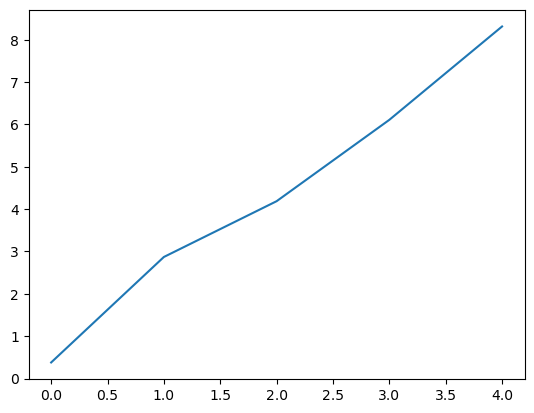

In [4]:
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.show()

In [5]:
class LinearRegressor(nn.Module):
    def __init__(self):
        super().__init__() # 모델 연산 정의
        self.fc = nn.Linear(1, 1, bias=True)
    
    def forward(self, x): 
        y = self.fc(x)
      
        return y  

In [9]:
model = LinearRegressor()
model

LinearRegressor(
  (fc): Linear(in_features=1, out_features=1, bias=True)
)

In [10]:
learning_rate = 1e-3
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [11]:
loss_stack = []
for epoch in range(1001):
    
    optimizer.zero_grad()
    
    y_hat = model(x)
    loss = criterion(y_hat,y)
    
    loss.backward()
    optimizer.step() 
    loss_stack.append(loss.item())
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch}:{loss.item()}')

Epoch 0:28.67351722717285
Epoch 100:1.9853696823120117
Epoch 200:0.18902650475502014
Epoch 300:0.06769661605358124
Epoch 400:0.05912880226969719
Epoch 500:0.058193840086460114
Epoch 600:0.05781292915344238
Epoch 700:0.05750509351491928
Epoch 800:0.057233892381191254
Epoch 900:0.056993432343006134
Epoch 1000:0.05677996948361397


In [13]:
with torch.no_grad():
    y_hat = model(x)
y_hat, y

(tensor([[0.6207],
         [2.5068],
         [4.3929],
         [6.2789],
         [8.1650]]),
 tensor([[0.3786],
         [2.8701],
         [4.1874],
         [6.1089],
         [8.3138]]))

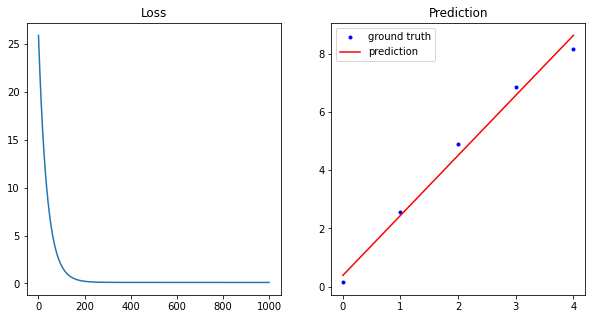

In [8]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(loss_stack)
plt.title("Loss")
plt.subplot(122)
plt.plot(x, y,'.b')
plt.plot(x, y_hat, 'r-')
plt.legend(['ground truth','prediction'])
plt.title("Prediction")
plt.show()